**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)
**Python version:**  3.x

# Preliminary operations

In [ ]:
# import main libraries
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
import pandas as pd

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get th path of lore algorithm modules
sys.path.append('/content/drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Explainable AI/CODICE LEZIONI/lore/')

In [ ]:
# import modules from lore
from util import record2str, neuclidean
from datamanager import prepare_adult_dataset, prepare_dataset

# Data Preparation

In [ ]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [ ]:
data_train = pd.concat(
    (df_data_train, df_info_train['emotion']),
    axis=1
)

data_test = pd.concat(
    (df_data_test, df_info_test['emotion']),
    axis=1
)

In [ ]:
# the prepare_dataset function extracts the following variables:
# - dataframe
# - feature names
# - class values (all possibile classes)
# - name of numeric columns
# - rdf: a dataframe with just real feature columnns
# - real feature names
# - features map (non so bene cosa sia)

class_name = 'emotion'
res = prepare_dataset(data_train, class_name)

# use the prepare_dataset function from lore
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res

df.head()

sum       std       q25       kur      skew  lag1_sum  lag1_kur  \
0  0.716365 -1.159462  1.215433  0.859870  1.608196  0.032995  0.662262   
1  0.669143 -1.108453  1.215433  1.070644  1.658463  0.032995  0.275624   
2  0.723227 -0.975264  2.047744  1.146381  1.781550 -1.036084  0.763118   
3  0.708504 -1.006749  1.215433  1.749201  1.981405 -0.815534  0.707610   
4  0.705644 -1.371989  1.215433  0.581488  1.436854 -0.815534  0.370417   

   lag1_skew    zc_sum  mfcc_sum  ...  mfcc_q95_w4  mfcc_q99_w4  mfcc_kur_w4  \
0   0.805546 -1.500797  0.399234  ...    -0.670034    -1.541948    -0.202342   
1   1.241144 -1.321006  0.408776  ...    -0.925068    -0.828006     0.275867   
2  -0.128356 -1.750464  0.490061  ...    -0.595362    -1.139805    -0.014546   
3   1.132806 -1.416084  0.750825  ...    -0.098577    -0.717890    -0.392469   
4  -0.060381 -1.569077 -0.145204  ...    -0.583115    -0.797341     0.154515   

   sc_std_w4  sc_kur_w4  sc_skew_w4  stft_sum_w4  stft_mean_w4  stft_kur_w4  \
0  -0.425145   3.147197   -2.200824     0.228251      1.542380    -0.159600   
1  -0.427448  -0.229617   -0.575310    -0.231871      1.094347     0.111549   
2  -0.246588   2.742928   -1.781613    -0.390360      1.161032    -0.289829   
3  -0.555570  -0.462721   -0.367839    -0.824689      1.017073     0.412375   
4  -0.249430   0.605878   -0.549321     0.241436      1.091298    -0.159600   

   emotion  
0        5  
1        5  
2        5  
3        5  
4        1  

[5 rows x 97 columns]

In [ ]:
class_values

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
# import train- and test-set splitter and cross validation score
from sklearn.model_selection import train_test_split, cross_val_score

# import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Classification

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Learning rate set to 0.081484
0:	learn: 2.0385682	total: 379ms	remaining: 6m 18s
1:	learn: 1.9985034	total: 637ms	remaining: 5m 17s
2:	learn: 1.9621473	total: 1s	remaining: 5m 32s
3:	learn: 1.9290666	total: 1.41s	remaining: 5m 49s
4:	learn: 1.8952786	total: 1.8s	remaining: 5m 57s
5:	learn: 1.8647990	total: 2.07s	remaining: 5m 43s
6:	learn: 1.8406290	total: 2.34s	remaining: 5m 31s
7:	learn: 1.8141030	total: 2.68s	remaining: 5m 32s
8:	learn: 1.7876233	total: 3.04s	remaining: 5m 34s
9:	learn: 1.7637011	total: 3.34s	remaining: 5m 31s
10:	learn: 1.7380183	total: 3.62s	remaining: 5m 25s
11:	learn: 1.7119310	total: 3.78s	remaining: 5m 10s
12:	learn: 1.6923207	total: 3.92s	remaining: 4m 57s
13:	learn: 1.6696981	total: 4.08s	remaining: 4m 47s
14:	learn: 1.6472258	total: 4.22s	remaining: 4m 37s
15:	learn: 1.6284388	total: 4.36s	remaining: 4m 28s
16:	learn: 1.6166445	total: 4.5s	remaining: 4m 20s
17:	learn: 1.6024316	total: 4.66s	remaining: 4m 14s
18:	learn: 1.5845600	total: 4.94s	remaining: 4m 1

In [ ]:
# def a predict fuction
def clf_predict(X):
    return clf.predict(X)

# def a predict proba function
def clf_predict_proba(X):
    return clf.predict_proba(X)

# Explanation

## Global Explanation

https://oracle.github.io/Skater/index.html

In [ ]:
#!pip install -U skater

In [ ]:
#from skater.model import InMemoryModel
#from skater.core.explanations import Interpretation

#from skater.core.global_interpretation.partial_dependence import PartialDependence

In [ ]:
#interpreter = Interpretation()
#interpreter.load_data(X_train, feature_names=feature_names)

In [ ]:
#model = InMemoryModel(bb_predict_proba, examples=X_test)
#interpreter.partial_dependence.plot_partial_dependence([feature_names[0], feature_names[1]],
#                                                       model, n_samples=100, n_jobs=1)
#plt.show()

In [ ]:
#from skater.model import InMemoryModel
#from skater.core.explanations import Interpretation

In [ ]:
#interpreter = Interpretation(X_train, feature_names=feature_names)
#model_inst = InMemoryModel(bb_predict_proba, examples=X_test) #, unique_values=class_values,
#                           #feature_names=feature_names, target_names=class_values)

In [ ]:
#surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, seed=42)
#surrogate_explainer.fit(X_test, y_test, use_oracle=True, prune='post', scorer_type='default')
#surrogate_explainer.plot_global_decisions(colors=['coral', 'lightsteelblue','darkkhaki'],
#                                         file_name='simple_tree_pre.png')
#show_in_notebook('simple_tree_pre.png', width=400, height=300)

In [ ]:
#from skater.core.global_interpretation.tree_surrogate import TreeSurrogate

In [ ]:
# import Decision-Tree classifier
from sklearn.tree import DecisionTreeClassifier
# import the plot-tree util from sklearn
from sklearn.tree import plot_tree

In [ ]:
# get predictions from Random-Forest, but from training-set
y_pred_train = clf_predict(X_train)

In [ ]:
# set the Decision-Tree Classifier
explainer = DecisionTreeClassifier(max_depth=4)
# fit the Decision-Tree Classifier with the Random-Forest predictions
explainer.fit(X_train, y_pred_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# import pydotplus library
import pydotplus
# import the entire tree module from sklearn (e.g.: DecisionTreeClassifier is inside the tree module)
from sklearn import tree
from IPython.display import Image

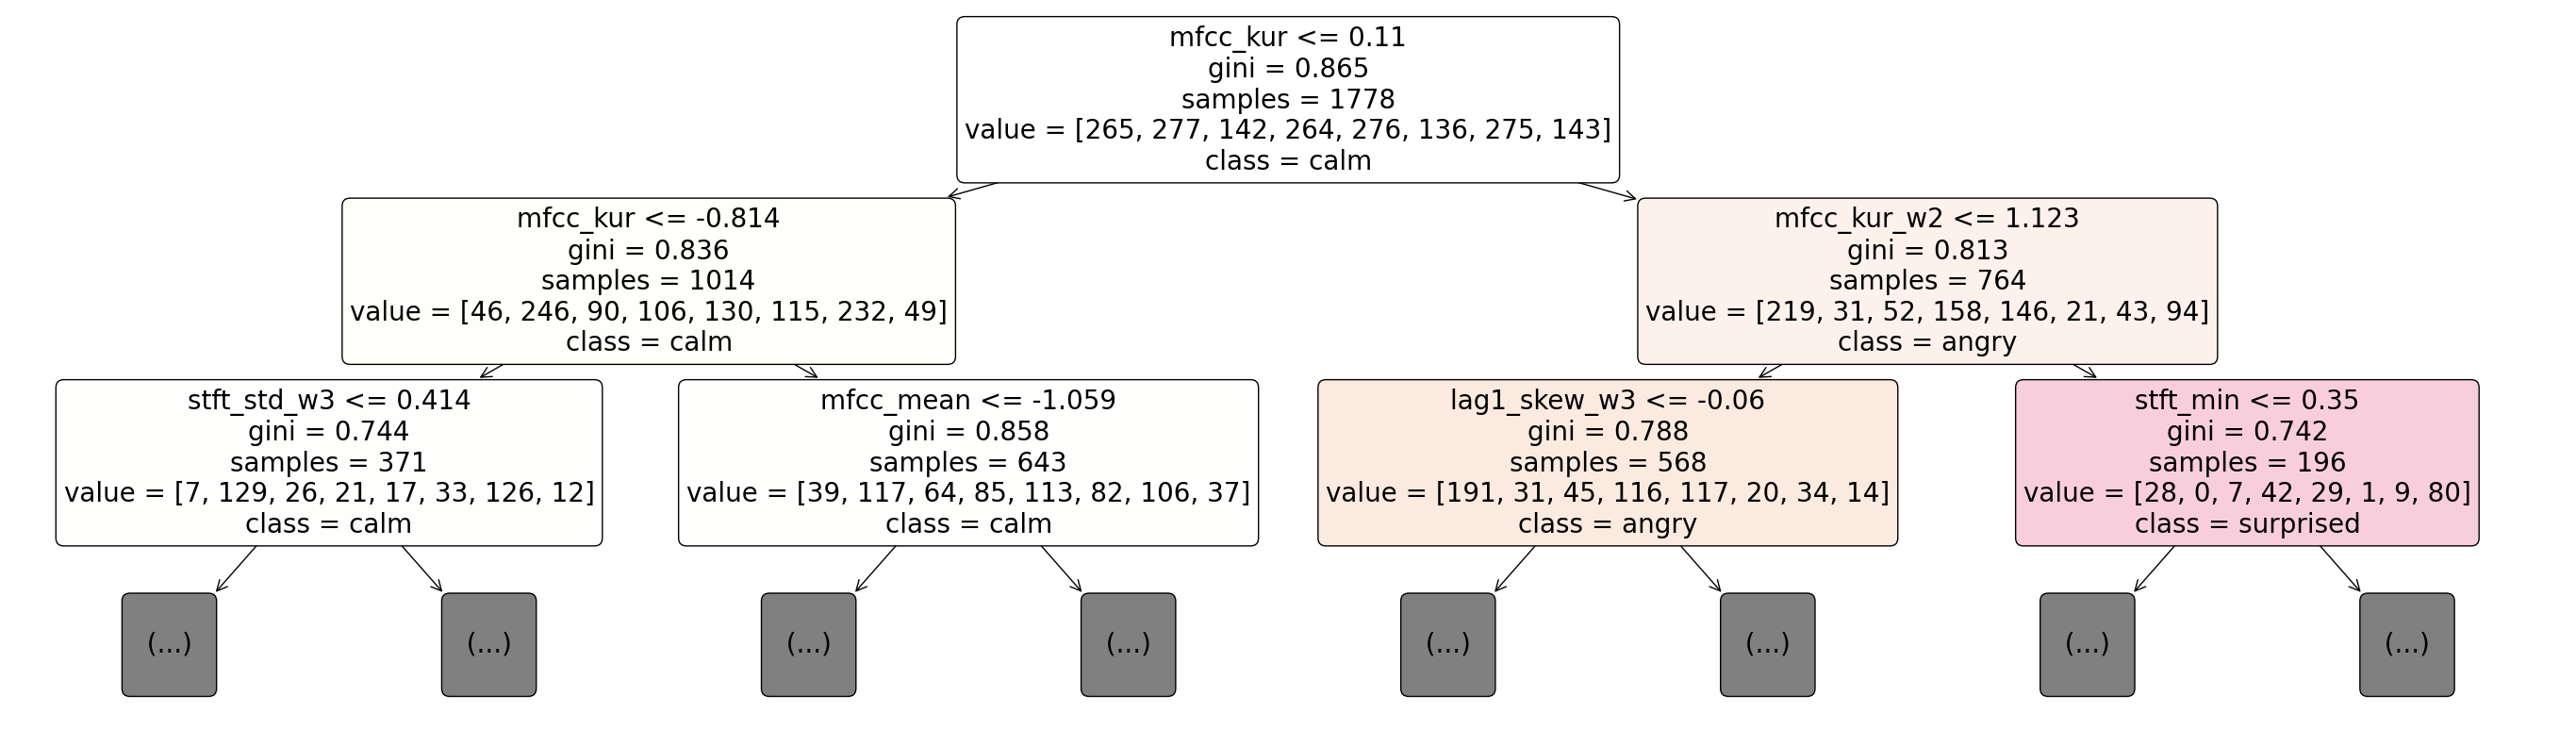

In [ ]:
# set figure size
plt.figure(figsize=(35, 10))

# plot the tree
plot_tree(
    explainer,
    feature_names=feature_names,
    class_names=class_values,
    filled=True,
    rounded=True,
    fontsize=20,
    max_depth=2
)

plt.savefig("XAI_global_tree.pdf", format="pdf")
plt.show()

## Local Explanations

In [ ]:
df_info_test.loc[63]

vocal_channel                                  song
emotion                                        calm
emotional_intensity                          normal
statement              Kids are talking by the door
repetition                                      1st
actor                                            19
sex                                               M
filename                   03-02-02-01-01-01-19.wav
frame_count                                  216216
Name: 63, dtype: object

In [1]:
y_pred[i2e_speech]

NameError: ignored

### Select a record to explain

In [ ]:
# i2e = instance to explain
# the instance to explain is the n° 22
i2e_speech = 4
i2e_song = 63

# get the record from the test-set
x_speech = X_test[i2e_speech]
x_song = X_test[i2e_song]

In [ ]:
# use the record2str function to get a vocabulary of feature names with respective feature values of the i2e
record2str(x_speech, feature_names, numeric_columns)
record2str(x_song, feature_names, numeric_columns)

'{ sum = 0.8798277647909786, std = -0.7665064729453759, q25 = 0.3831211742426123, kur = -0.6030915119429455, skew = -1.277948448901207, lag1_sum = 0.8815233589752322, lag1_kur = -0.6998250183666942, lag1_skew = 1.379241489485483, zc_sum = -0.5059107266965066, mfcc_sum = -0.6628718505151578, mfcc_mean = -0.002777293491876017, mfcc_max = 0.1515376110811996, mfcc_q05 = -0.1705641642163141, mfcc_q25 = 0.04219080847283523, mfcc_q75 = 1.097974403998661, mfcc_q95 = 1.248316277629901, mfcc_kur = 0.1422992893419211, mfcc_skew = 0.01453683446222304, sc_sum = 0.6298999732994668, sc_mean = -0.1786313245908158, sc_std = 0.5921156710653798, sc_min = 0.6806079649102498, sc_max = 0.3534316514017758, sc_q25 = -0.6167518021666843, stft_sum = 1.202434785063132, stft_std = 0.2162282257770366, stft_min = 0.118244559607003, stft_kur = -0.9796733932182002, sum_w1 = -1.150802935394345, std_w1 = -0.03014982015433356, q25_w1 = -0.5838125680329064, kur_w1 = 0.891102956911761, skew_w1 = -1.625966182233099, lag1_s

In [ ]:
# get the first prediction
bb_outcome_speech = clf_predict(x_speech.reshape(1, -1))[0]
bb_outcome_song = clf_predict(x_song.reshape(1, -1))[0]

# get the class_value (the string version) of the first prediction
#bb_outcome_str_speech = class_values[bb_outcome_speech]
#bb_outcome_str_song = class_values[bb_outcome_song]

print('bb(x) = { %s }' % bb_outcome_speech)
print('bb(x) = { %s }' % bb_outcome_song)

bb(x) = { ['calm'] }
bb(x) = { ['calm'] }


### LIME

https://github.com/marcotcr/lime

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# set LIME explainer
lime_explainer = LimeTabularExplainer(
    X_test, # dataset
    feature_names=feature_names, # feature names
    class_names=[str(v) for v in class_values], # class names (possible class values)
    discretize_continuous=False
)

In [ ]:
# explain the x instance (defined before with i2e)
exp_speech = lime_explainer.explain_instance(
    x_speech,
    clf_predict_proba
)

exp_song = lime_explainer.explain_instance(
    x_song,
    clf_predict_proba
)

In [ ]:
exp_speech.local_exp

{1: [(1, -0.04039565339669328),
  (16, -0.020649004390891224),
  (82, -0.01958240635840885),
  (15, 0.017466661766764098),
  (71, -0.014246956971049872),
  (55, 0.013134765392177103),
  (67, 0.011781298397889285),
  (4, -0.007507268506196837),
  (68, -0.007206985839417813),
  (69, 0.005940985801236489)]}

In [ ]:
exp_song.local_exp

{1: [(1, -0.04234547114506266),
  (82, -0.018684183843307323),
  (71, -0.015694147360316487),
  (15, 0.015285095258083681),
  (67, 0.013376909403536068),
  (55, 0.012154411396233335),
  (56, -0.01082569594141953),
  (62, 0.009124776390608057),
  (4, -0.006511752863151509),
  (69, 0.003666901527418008)]}

In [ ]:
exp_speech.show_in_notebook()

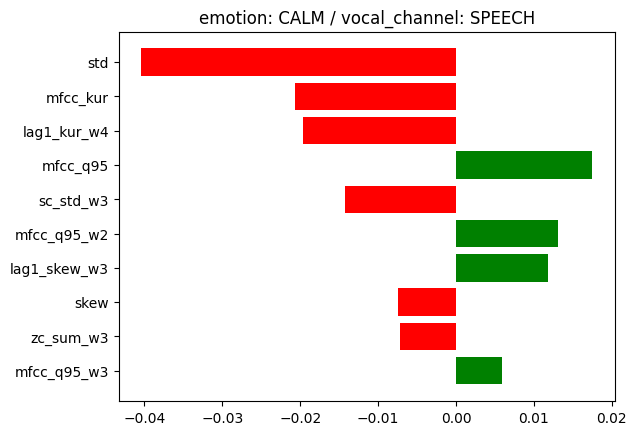

In [ ]:
exp_speech.as_pyplot_figure()
plt.title("emotion: CALM / vocal_channel: SPEECH")
plt.savefig("lime_speech.pdf", format="pdf", bbox_inches = "tight")
plt.show()

In [ ]:
exp_song.show_in_notebook()

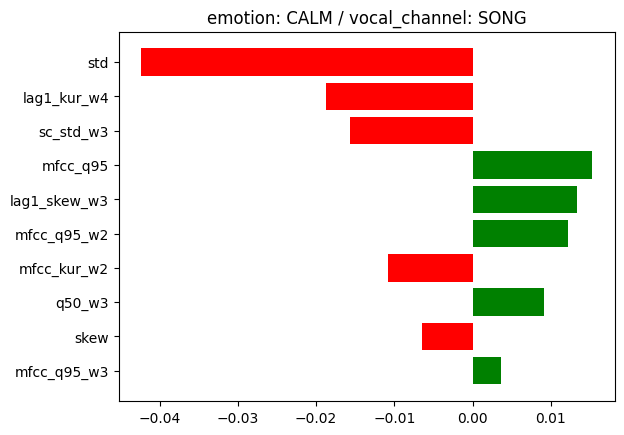

In [ ]:
exp_song.as_pyplot_figure()
plt.title("emotion: CALM / vocal_channel: SONG")
plt.savefig("lime_song.pdf", format="pdf", bbox_inches = "tight")
plt.show()

### SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import SHAP algorithm
import shap

In [ ]:
f = lambda x: clf_predict_proba(x)[:, 1]

# get the median of each feature of test-set
med = np.median(
    X_test,
    axis=0

# reshape the median matrix with this shape (1, n. of features)
).reshape(
    (1, X_test.shape[1])

)

shap_explainer = shap.KernelExplainer(f, med)

In [ ]:
# get shap values of the instance x (i2e)
shap_values_single_speech = shap_explainer.shap_values(x_speech, nsamples=1000)
shap_values_single_speech

array([-0.01014129,  0.20383424,  0.01610588,  0.        ,  0.0606785 ,
        0.0019927 ,  0.        ,  0.00832528,  0.01647057, -0.00336724,
        0.        , -0.01281358,  0.00875103, -0.04253666,  0.05158217,
        0.04329177,  0.08550122, -0.00489428,  0.00462877, -0.01461969,
       -0.00431067, -0.01048045, -0.01302576,  0.00690549,  0.04949829,
        0.04059882, -0.01889292,  0.02636897,  0.00163201, -0.00621491,
        0.        ,  0.        ,  0.002855  ,  0.00245333, -0.00755448,
       -0.00153764,  0.0084608 , -0.00649669,  0.00354408, -0.00345198,
       -0.01498004,  0.        , -0.00301418,  0.02888793,  0.00155369,
       -0.00583158, -0.00264266, -0.00875546,  0.00140475,  0.        ,
        0.        ,  0.00448487, -0.00539995,  0.        ,  0.01303815,
        0.04896108,  0.        ,  0.        , -0.00386976,  0.01824025,
        0.00498517,  0.        ,  0.02919302,  0.00938284,  0.        ,
        0.00645784,  0.        ,  0.02067702,  0.04413231,  0.07

In [ ]:
# get shap values of the instance x (i2e)
shap_values_single_song = shap_explainer.shap_values(x_song, nsamples=1000)
shap_values_single_song

array([-0.00814875,  0.06495979,  0.00923967,  0.02287994,  0.05637403,
       -0.00550313,  0.01399326,  0.02089379,  0.        ,  0.02851366,
       -0.02170778, -0.00625075,  0.01491502, -0.00702232,  0.01118302,
        0.03774135,  0.03819022,  0.        ,  0.00567264,  0.00569506,
        0.00489623,  0.00432311,  0.        ,  0.01107339,  0.05702787,
        0.        ,  0.        , -0.01178842, -0.02095421, -0.00569489,
       -0.00572487,  0.        ,  0.03770398,  0.        ,  0.01225295,
       -0.00430201,  0.00368645,  0.00172788,  0.00837599,  0.00490868,
        0.00926241, -0.00809827,  0.00929517,  0.01443318,  0.01940617,
        0.00323499,  0.02027028,  0.00319237,  0.        , -0.02662315,
        0.00315223, -0.00872783, -0.0044549 ,  0.        , -0.01212931,
        0.0460125 ,  0.        , -0.003843  ,  0.        ,  0.01254843,
        0.02234375,  0.00276011,  0.04871678,  0.00384605,  0.        ,
        0.        ,  0.        ,  0.06065683,  0.02644027,  0.05

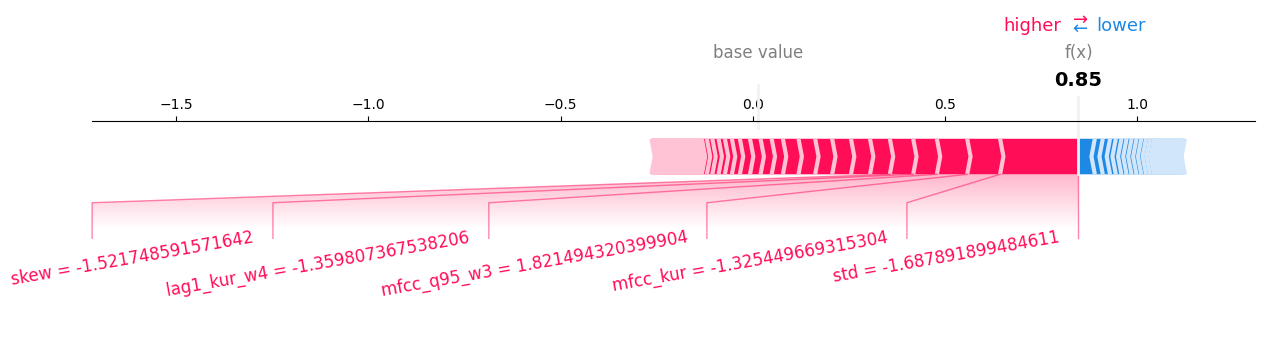

AttributeError: ignored

In [ ]:
shap.force_plot(
    shap_explainer.expected_value, # expected value of the record
    shap_values_single_speech, # shap values of the record
    features=x_speech, # fature values (i.e., the record)
    feature_names=feature_names, # feature names
    matplotlib=True,
    figsize=(15, 3),
    text_rotation=10
)

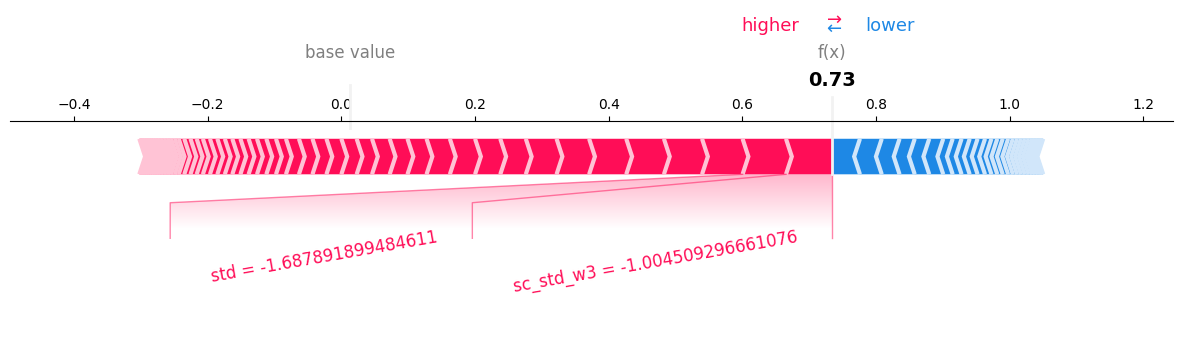

In [ ]:

shap.force_plot(
    shap_explainer.expected_value, # expected value of the record
    shap_values_single_song, # shap values of the record
    features=x_speech, # fature values (i.e., the record)
    feature_names=feature_names, # feature names
    matplotlib=True,
    figsize=(15, 3),
    text_rotation=10
)

In [ ]:
shap_values = shap_explainer.shap_values(
    X_test[0:100,:],
    nsamples=1000
)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# google colab needs shap.initjs() in each cell where there is a visualization
shap.initjs()

shap.force_plot(
    shap_explainer.expected_value,
    shap_values,
    X_test,
    feature_names=feature_names
)

### LORE

In [ ]:
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lorem import LOREM
from sklearn import preprocessing

In [ ]:
#predictions = clf_predict(X_test)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(class_values)
class_values_int = le.transform(class_values)
#clf_predict_int = le.transform(predictions)

In [ ]:
def clf_predict_to_int(X):
    return le.transform(clf.predict(X))

In [ ]:
# set the LORE explainer
lore_explainer = LOREM(
    X_test, # test-set with just real features
    clf_predict_to_int, # predictions of Random-Forest
    feature_names, # names of all features
    class_name, # name of class column
    class_values_int, # the possibile values of the class
    numeric_columns, # numeric column names
    features_map, # feature map
    neigh_type='geneticp', # boh
    categorical_use_prob=True,
    continuous_fun_estimation=False,
    size=1000,
    ocr=0.1,
    random_state=42,
    ngen=10,
    bb_predict_proba=clf_predict_proba,
    verbose=True
)

calculating feature values


In [ ]:
# get the explanation of a record
exp_speech = lore_explainer.explain_instance(
    x_speech, # record to explain (i2e)
    samples=300, # n. of samples
    use_weights=True, # weighted method
    metric=neuclidean # metric
)

generating neighborhood - geneticp
gen	nevals	avg     	min     	max     
0  	150   	0.496654	0.496654	0.496654
1  	130   	0.651078	0.382491	0.980108
2  	124   	0.73205 	0.232645	0.992942
3  	126   	0.80304 	0.122096	0.992942
4  	126   	0.807003	0.24292 	0.992886
5  	134   	0.798701	0.195954	0.992616
6  	126   	0.806688	0.190939	0.991125
7  	132   	0.780527	0.283911	0.987915
8  	129   	0.77791 	0.213537	0.988351
9  	121   	0.801041	0.220206	0.988351
10 	124   	0.818604	0.14112 	0.987915
gen	nevals	avg	min	max
0  	150   	0.5	0.5	0.5
1  	128   	0.560983	0.389431	0.959977
2  	119   	0.673617	0.420023	0.958912
3  	137   	0.76731 	0.33916 	0.958912
4  	131   	0.812518	0.239632	0.958912
5  	132   	0.828016	0.359048	0.958912
6  	130   	0.835753	0.264763	0.964501
7  	132   	0.841887	0.376542	0.964501
8  	122   	0.845348	0.501674	0.959447
9  	129   	0.847514	0.448214	0.971957
10 	131   	0.84918 	0.349167	0.971957
synthetic neighborhood class counts {0: 57, 1: 126, 2: 8, 3: 49, 4: 56, 6: 34}
lear

In [ ]:
# get the explanation of a record
exp_song = lore_explainer.explain_instance(
    x_song, # record to explain (i2e)
    samples=300, # n. of samples
    use_weights=True, # weighted method
    metric=neuclidean # metric
)

generating neighborhood - geneticp
gen	nevals	avg     	min     	max     
0  	150   	0.496654	0.496654	0.496654
1  	123   	0.630188	0.428959	0.984724
2  	124   	0.693591	0.234556	0.992852
3  	128   	0.750889	0.281585	0.991464
4  	131   	0.728793	0.240122	0.991464
5  	124   	0.742423	0.257021	0.991464
6  	124   	0.783498	0.29413 	0.991275
7  	129   	0.782679	0.293984	0.991275
8  	136   	0.746402	0.262098	0.991403
9  	127   	0.779406	0.219777	0.990936
10 	131   	0.804089	0.3408  	0.990936
gen	nevals	avg	min	max
0  	150   	0.5	0.5	0.5
1  	129   	0.560639	0.408198	0.947506
2  	131   	0.666522	0.394504	0.962836
3  	131   	0.807784	0.253133	0.970183
4  	134   	0.823849	0.316564	0.970183
5  	120   	0.857963	0.32879 	0.972431
6  	130   	0.863234	0.303294	0.972431
7  	132   	0.866508	0.421405	0.972431
8  	129   	0.84714 	0.378946	0.970183
9  	124   	0.86455 	0.391161	0.970183
10 	135   	0.863428	0.352345	0.970183
synthetic neighborhood class counts {0: 117, 1: 116, 2: 1, 3: 26, 4: 43, 5: 2, 6: 2

In [ ]:
print(exp_speech)

r = { std <= 0.03, mfcc_q95_w3 > -0.25, mfcc_skew > -0.82, stft_sum_w2 > -1.05, mfcc_kur > -1.41, lag1_kur_w3 > -1.81, zc_sum_w2 <= 1.45 } --> { emotion: 1 }
c =  }


In [ ]:
print(exp_song)

r = { std <= -0.07, stft_sum_w4 > -0.26, kur_w3 <= 0.03, q25 <= 1.34, q25 > -1.26, sum_w4 <= 1.46, q25_w4 > -0.82, stft_kur_w4 <= 2.00, std_w4 > -1.11 } --> { emotion: 1 }
c =  }


In [ ]:
from sklearn.tree import plot_tree

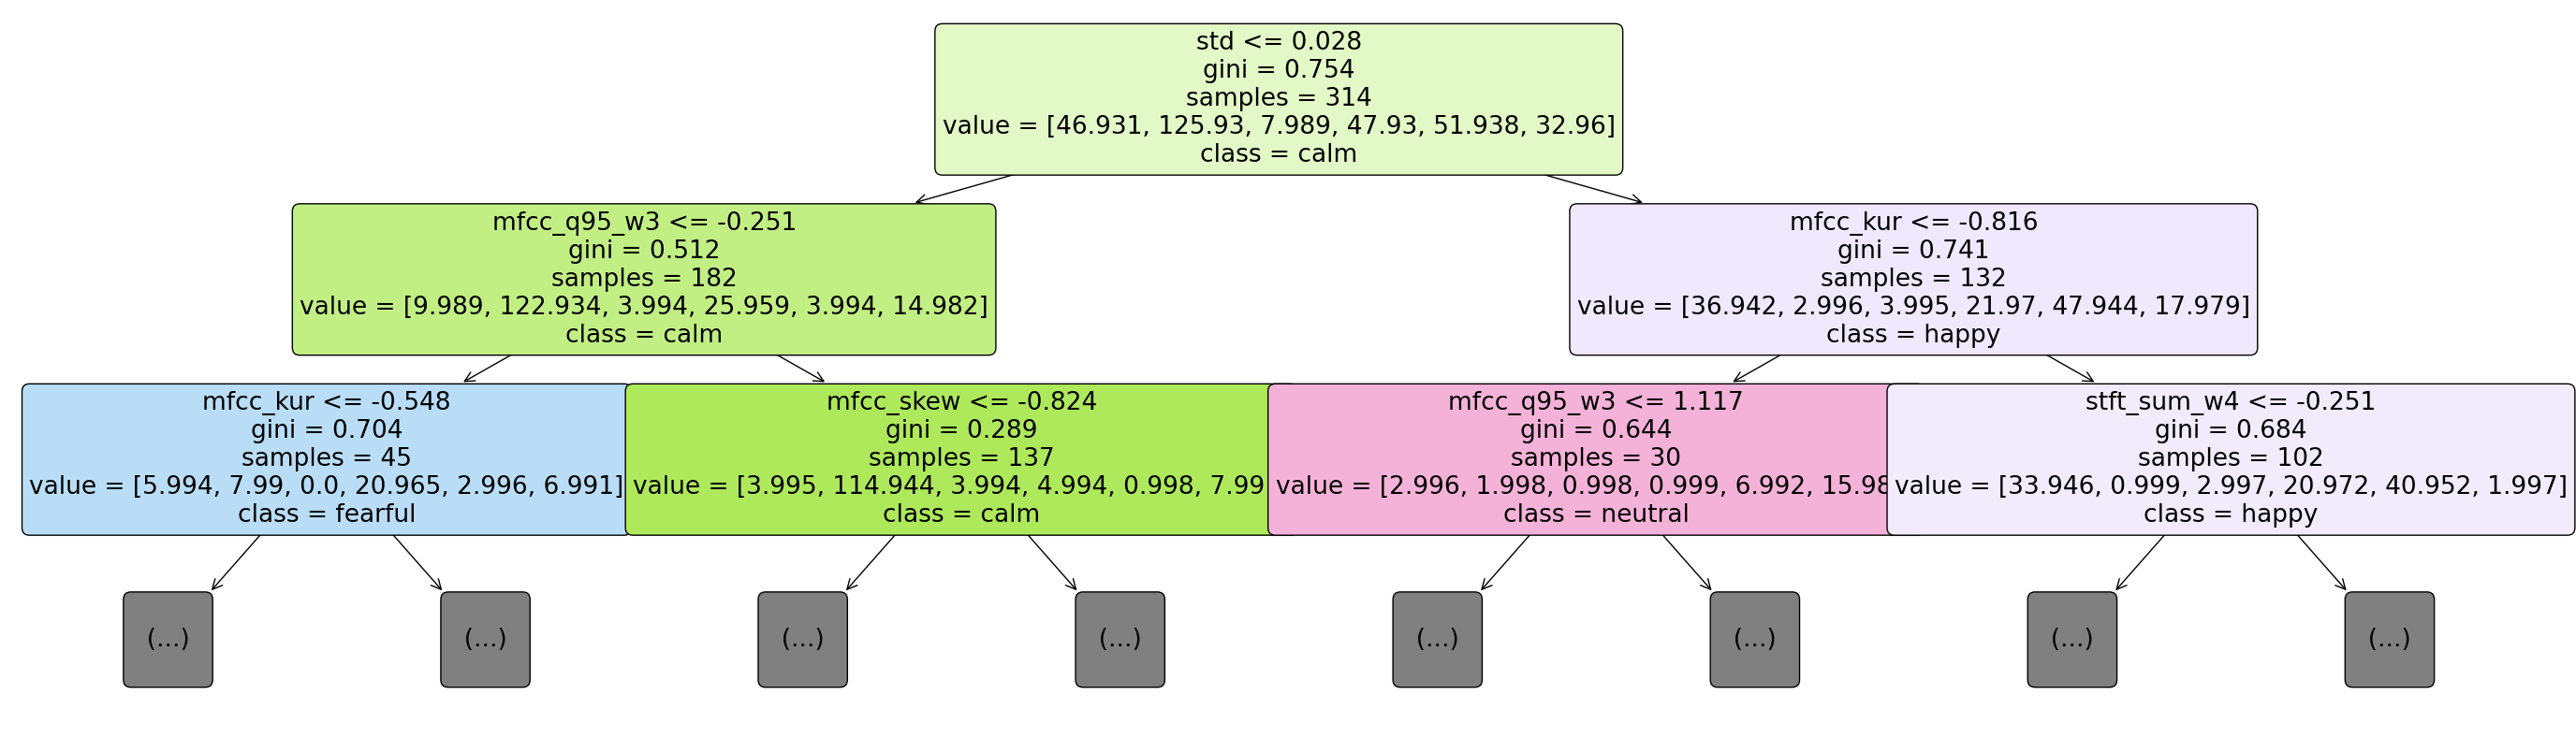

In [ ]:
plt.figure(figsize=(35, 10))
plot_tree(exp_speech.dt,
          feature_names=feature_names,
          class_names=class_values,
          filled=True,
          rounded=True,
          fontsize=19,
          max_depth=2)
plt.savefig("LORE_speech.pdf", format="pdf")
plt.show()

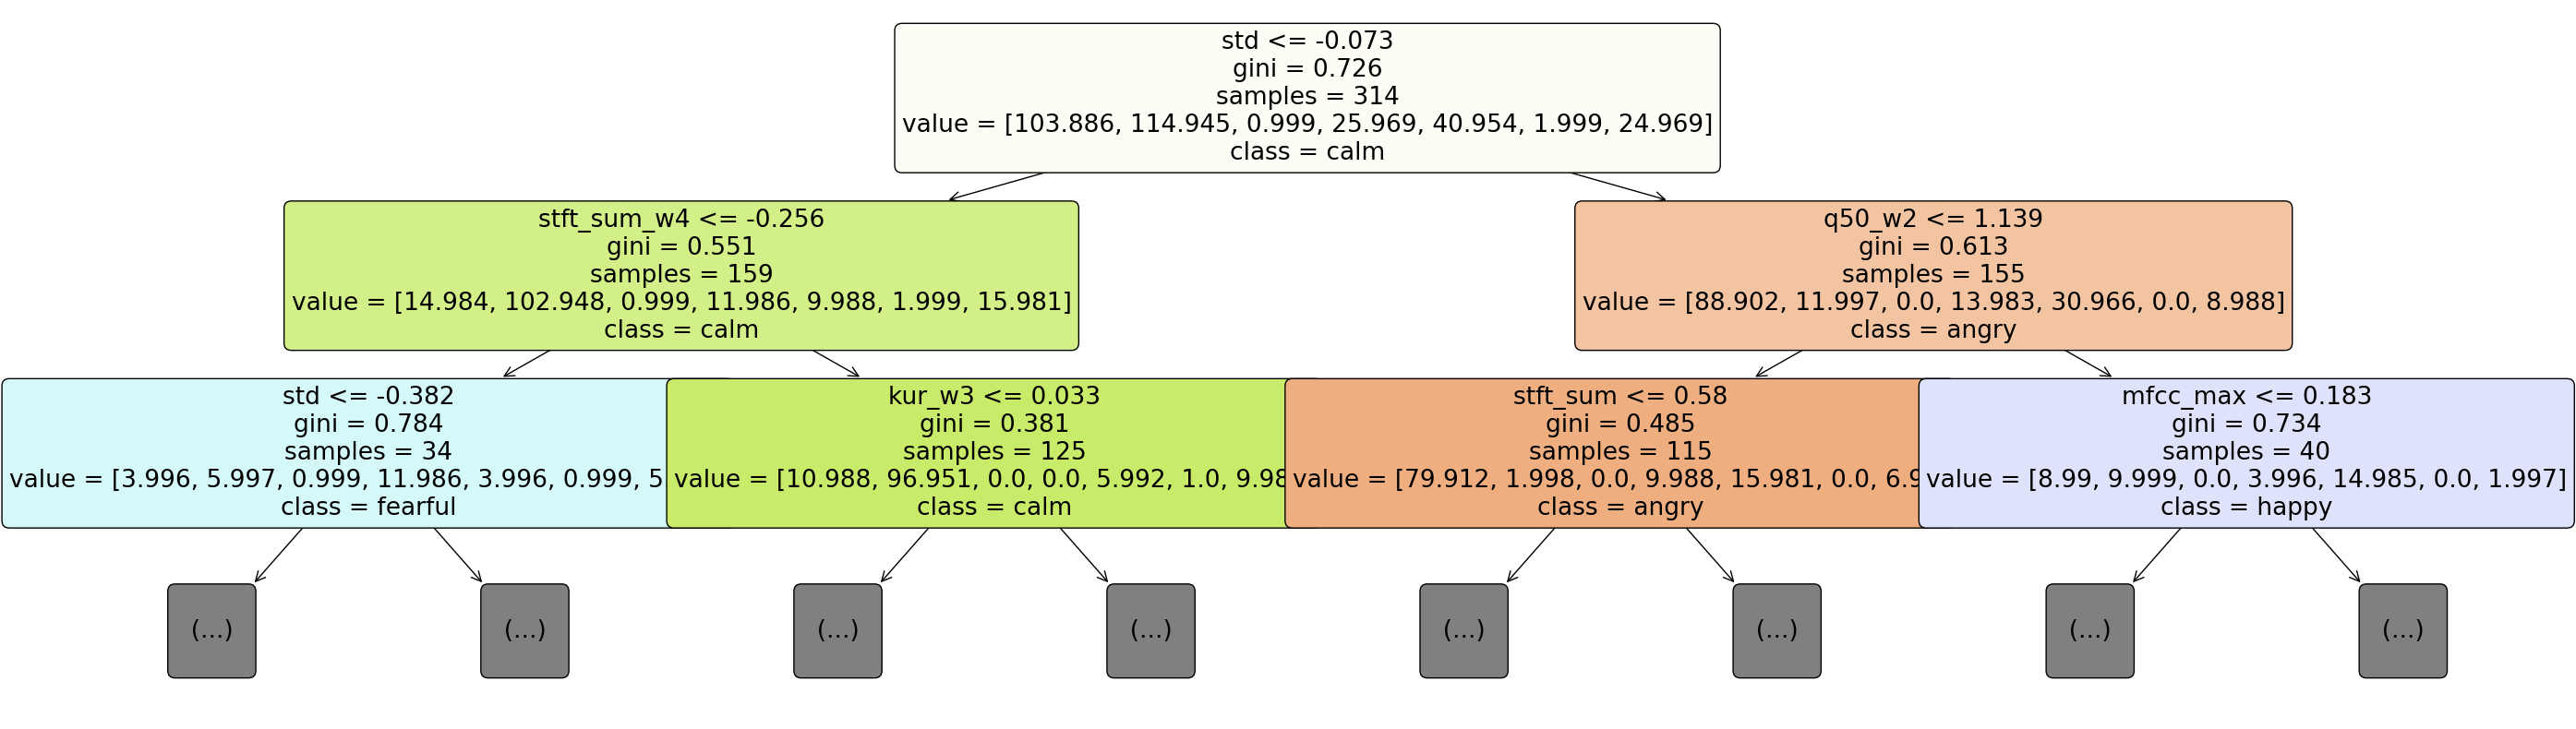

In [ ]:
plt.figure(figsize=(35, 10))
plot_tree(exp_song.dt,
          feature_names=feature_names,
          class_names=class_values,
          filled=True,
          rounded=True,
          fontsize=19,
          max_depth=2)
plt.savefig("LORE_song.pdf", format="pdf")
plt.show()

### DALEX

https://dalex.drwhy.ai/python-dalex-titanic.html

https://github.com/ModelOriented/DALEX

#### Counterfactual Explanations

In [ ]:
!pip install fat-forensics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fatf.transparency.predictions.counterfactuals as fatf_cf

In [ ]:
X_test

array([[ 1.01662908, -1.21779537,  0.84734331, ...,  0.05289631,
         1.31264851,  1.6950718 ],
       [ 0.67869056, -1.25433418,  0.72653205, ..., -1.1910513 ,
         0.63580421,  0.9612992 ],
       [-0.89432328, -1.28411159,  0.99909745, ..., -0.69244479,
         0.74127233, -0.46949949],
       ...,
       [ 1.07591205,  0.78192708, -1.17403111, ..., -1.45464129,
        -1.50255572, -0.59369797],
       [ 1.18710939,  0.78378028, -1.13656521, ..., -0.1190827 ,
        -0.49148077,  0.19294398],
       [ 0.93170156,  1.15564809, -1.43076807, ...,  0.54326123,
        -0.35969273,  0.58582411]])

In [ ]:
# Create a Counterfactual Explainer
cf_explainer = fatf_cf.CounterfactualExplainer(
    model=clf,
    dataset=X_test,
    categorical_indices=[],
    default_numerical_step_size=1,
    max_counterfactual_length=1
)

In [ ]:
x_speech.shape

(96,)

In [ ]:
dp_1_cf_tuple = cf_explainer.explain_instance(x_speech)
dp_1_cfs, dp_1_cfs_distances, dp_1_cfs_predictions = dp_1_cf_tuple

IndexError: ignored

In [ ]:
dp_1_cfs

In [ ]:
dp_1_cfs_text = fatf_cf.textualise_counterfactuals(
    x_speech,
    dp_1_cfs,
    instance_class=bb_outcome,
    counterfactuals_distances=dp_1_cfs_distances,
    counterfactuals_predictions=dp_1_cfs_predictions)
print(dp_1_cfs_text)

In [ ]:
x1.shape